In [1]:
import pandas as pd

In [2]:
videoigre1 = pd.read_csv ('../obdelani-podatki/videoigre.csv')

In [3]:
zanri = pd.read_csv ('../obdelani-podatki/zanri.csv')

In [4]:
publisherji = pd.read_csv ('../obdelani-podatki/publisherji.csv')

In [5]:
ESRB = pd.read_csv ('../obdelani-podatki/ESRB-deskriptorji.csv')

In [6]:
platforme = pd.read_csv ('../obdelani-podatki/platforme.csv')

In [24]:
videoigre = videoigre1[videoigre1.metascore >= 70.0]

In [41]:
videoigre

,naslov,datum,leto,metascore,stevilo_glasov_metascore,ocena_uporabnikov,stevilo_glasov_uporabnikov,oznaka,developer,stevilo_online_igralcev,stevilo_igralcev
0,The Legend of Zelda: Ocarina of Time,1998-11-23,1998,99.0,22,9.1,5749.0,E,Nintendo,NaN,1 Player
1,Tony Hawk's Pro Skater 2,2000-09-20,2000,98.0,19,7.4,647.0,T,Neversoft Entertainment,NaN,1-2 Players
2,Grand Theft Auto IV,2008-04-29,2008,98.0,64,7.6,3806.0,M,Rockstar North,NaN,1 Player
3,SoulCalibur,1999-09-08,1999,98.0,24,8.5,324.0,T,Namco,NaN,1-2 Players
4,Grand Theft Auto IV,2008-04-29,2008,98.0,86,7.9,3364.0,M,Rockstar North,16 Players Online Up to 16 Players,1 Player
...,...,...,...,...,...,...,...,...,...,...,...
9910,Beyond A Steel Sky,2020-07-16,2020,70.0,28,7.1,19.0,NaN,Revolution Software,NaN,NaN
9911,Guitar Hero: Aerosmith,2008-06-29,2008,70.0,59,6.6,54.0,T,Neversoft Entertainment,2 Players Online,1-2 Players
9912,The Urbz: Sims in the City,2004-11-09,2004,70.0,28,6.5,10.0,T,Maxis,NaN,1-2 Players
9913,GripShift,2005-09-12,2005,70.0,37,8.5,24.0,E,Sidhe Interactive,NaN,1-4 Players


HIPOTEZA: Novejše videoigre imajo boljšo oceno metascore in oceno uporabnikov.

In [25]:
po_letih = videoigre.groupby('leto')

<AxesSubplot:xlabel='leto'>

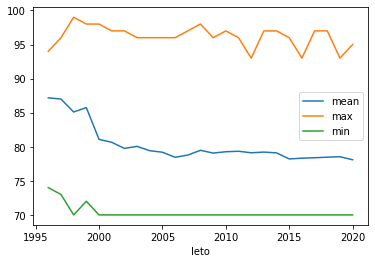

In [26]:
po_letih.metascore.agg(['mean', 'max', 'min']).plot()

<AxesSubplot:xlabel='leto'>

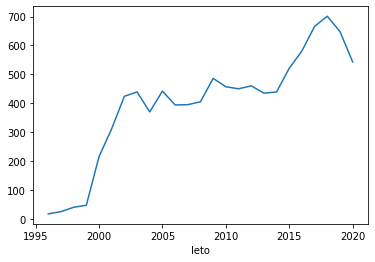

In [27]:
po_letih.size().plot()

S prvega grafa razberemo, da povprečna metascore ocena videoiger po letih v resnici rahlo vpada, vendar nam drug graf razkrije, da pa je hkrati v zadnjih letih veliko več iger, ki imajo visoko oceno (in so vsebovani v naših podatkih, ki vsebujejo videoigre z oceno metascore 70.0 ali več). Prvi graf nam tudi pove, da ni nobene povezave med letom in najboljšo ali najslabšo ocenjeno igro posameznega leta.

<AxesSubplot:xlabel='leto'>

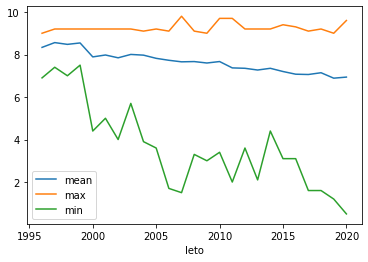

In [28]:
po_letih.ocena_uporabnikov.agg(['mean', 'max', 'min']).plot()

Prav tako ocena uporabnikov ne narašča skozi leta, vendar kvečjemu rahlo vpada.

VPRAŠANJE: Ali obstaja povezava med številom igralcev in oceno uporabnikov?

In [29]:
po_igralcih = videoigre.groupby('stevilo_igralcev')

In [30]:
po_igralcih.ocena_uporabnikov.mean().sort_values()

stevilo_igralcev
1 Player 1-6 Players       5.800000
1-4 Players 1-6 Players    6.000000
1 Player 1-4 Players       6.500000
Massively Multiplayer      7.532000
1-4 Players                7.694268
1-3 Players                7.721429
1-6 Players                7.736066
1-5 Players                7.745455
1-8 Players                7.817671
1-2 Players                7.830314
1-64 Players               7.837500
1-16 Players               7.870130
1 Player                   7.889330
1-10 Players               7.892857
1-12 Players               7.956250
1-32 Players               8.052632
64+ Players                8.133333
1 Player 1-2 Players       8.180000
1 Player 1-8 Players       8.200000
1-14 Players               8.300000
 1 Player                  8.500000
1 Player 1-5 Players       8.600000
Name: ocena_uporabnikov, dtype: float64

In [31]:
po_igralcih.size().sort_values()

stevilo_igralcev
 1 Player                     1
1 Player 1-5 Players          1
1 Player 1-6 Players          1
1 Player 1-8 Players          1
1-14 Players                  1
1-4 Players 1-6 Players       1
1 Player 1-4 Players          2
64+ Players                   3
1 Player 1-2 Players          5
1-64 Players                  8
1-5 Players                  11
1-10 Players                 14
1-3 Players                  15
1-12 Players                 16
1-32 Players                 38
Massively Multiplayer        51
1-6 Players                  62
1-16 Players                 79
1-8 Players                 258
1-4 Players                 821
1-2 Players                 876
1 Player                   1490
dtype: int64

Iz zgornjih podatkov lahko razberemo, da ne obstaja močne povezave med številom igralcev in povprečno oceno uporabnikov. Visoko oceno imajo igre za enega igralca kot tudi igre za več igralcev. Nekoliko slabšo oceno pa imajo igre, ki so "Massively Multiplayer". Vidimo pa lahko tudi, da obstaja precej več iger za enega igralca in malo igralcev kot pa za veliko igralcev naenkrat.

VPRAŠANJE: Kateri žanri so najbolj priljubljeni?

In [32]:
skupaj_z_zanri = pd.merge(videoigre, zanri, left_on='naslov', right_on='naslov')

In [33]:
po_zanrih = skupaj_z_zanri.groupby('zanr')

In [34]:
po_zanrih.size().sort_values(ascending=False).head(15)

zanr
Action              7056
General             5815
Shooter             3823
Action Adventure    3616
Sim                 2946
Sports              2918
Arcade              2458
Platformer          2450
2D                  2397
First-Person        2172
Modern              2138
Traditional         2134
Role-Playing        2132
Sci-Fi              1859
Fantasy             1820
dtype: int64

In [35]:
po_zanrih.metascore.agg(['max']).sort_values('max', ascending=False).head(15)

,max
zanr,
Fantasy,99.0
Action Adventure,99.0
Sports,98.0
Fighting,98.0
Individual,98.0
3D,98.0
Open-World,98.0
Skate / Skateboard,98.0
Skateboarding,98.0


Po številu videoiger posameznega žanra v naših podatkih lahko rečemo, da je daleč najbolj priljubljen žanr 'Action', sledijo pa mu tudi 'Shooter', 'Sim', 'Sports' in 'Arcade'. Po igri z najboljšo oceno metascore posameznega žanra pa zmaga 'Fantasy', ampak mu tesno sledijo tudi ostali žanri.

In [36]:
po_zanrih.ocena_uporabnikov.agg(['max']).sort_values('max', ascending=False).head(15)

,max
zanr,
Strategy,9.8
Fantasy,9.8
Real-Time,9.8
2D,9.7
Flight,9.7
General,9.7
Modern Jet,9.7
Platformer,9.7
Role-Playing,9.7


Po oceni uporabnikov pa prevladajo žanri kot so 'Strategy', 'Fantasy', 'Real-Time', 'Flight', 'Role-Playing' in 'Simulation'.

VPRAŠANJE: Ali obstaja povezava med oceno metascore in oceno uporabnikov?

<AxesSubplot:xlabel='metascore', ylabel='ocena_uporabnikov'>

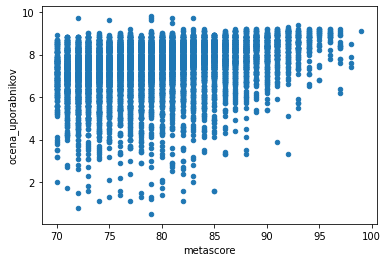

In [37]:
videoigre.plot.scatter('metascore', 'ocena_uporabnikov')

Z grafa lahko razberemo, da imajo videoigre z visoko oceno metascore običajno tudi visoko oceno uporabnikov, medtem ko pa imajo videoigre z nižjo metascore oceno prav tako lahko visoko oceno uporabnikov. Ta trend (z rahlim odstopanjem zaradi izstopajočih vrednosti) lahko opazujemo tudi na spodnjem grafu, ki prikazuje odvisnost povprečne ocene uporabnikov v odvisnosti od ocene metascore.

In [38]:
po_metascoru = videoigre.groupby('metascore')

<AxesSubplot:xlabel='metascore'>

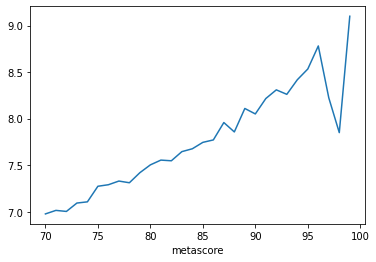

In [39]:
po_metascoru.ocena_uporabnikov.mean().plot()

VPRAŠANJE: Katera podjetja so ustvarila videoigre z najboljšo oceno?

In [42]:
po_developerju = videoigre.groupby('developer')

In [44]:
po_developerju.size().sort_values(ascending=False).head(15)

developer
Capcom               207
Telltale Games       183
EA Sports            168
EA Canada            132
Nintendo             116
Ubisoft Montreal     102
Konami                87
Codemasters           83
Visual Concepts       73
EA Tiburon            72
Electronic Arts       71
Square Enix           69
Ubisoft               65
Treyarch              52
Traveller's Tales     50
dtype: int64

Iz zgornjih podatkov lahko razberemo, da je Capcom ustvarilo največ iger z metascore 70.0 ali več. Nad 100 takih iger so ustvarila tudi podjetja Telltale Games, EA Sports, EA Canada, Nintendo in Ubisoft Montreal.

VPRAŠANJE: Katera podjetja so ustvarila najboljše igre primerne za PC?